<a href="https://colab.research.google.com/github/Nurra0210/Tugas-Besar-JST/blob/main/jurnal_JST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

PREPROCESSING DATASET

In [ ]:
# read data
dataset = pd.read_csv('/content/dataset-vertebral column.csv')

# set data & label
X = dataset.iloc[:, :-1].values # menampung data
Y = dataset.iloc[:, -1].values # menampung label

# MinMax Normalization
X = minmax_scale(X)

# One-hot Encoding
Y_encode = []
for index,i in enumerate(Y.tolist()):
  if i == 1: Y_encode.append([1,0,0])
  if i == 2: Y_encode.append([0,1,0])
  if i == 3: Y_encode.append([0,0,1])

# Split training & testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y_encode, test_size=.3)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TRAINING

In [ ]:
# Sigmoid activation
def sigmoid(x):
  return 1/(1 + np.exp(-x))
sig = np.vectorize(sigmoid)

In [ ]:
# Nguyen-Widraw
def nguyen_widrow(n,p):
  # n = 6 #input
  # p = 5 #hidden

  weight = np.random.uniform(low=-5, high=5, size=(p,n))
  beta = .7*(p**(1/n))
  bias = np.random.uniform(low=-beta, high=beta, size=p)
  norm_hidden = []

  for i in range(p):
    jum = 0
    for j in range(n):
      jum += weight[i][j]**2
    norm_hidden.append(jum**(1/2))
  
  for i in range(p):
    for j in range(n):
      weight[i][j] = beta * weight[i][j] / norm_hidden[i]

  return weight, bias

In [ ]:
def model_fit(hidden_layer, input_layer, output_layer, x_train, y_train, epoch, nw):
  loss_values = []
  acc_values = []

  # inisialisasi bobot dan bias: hidden layer
  if nw:
    w_hidden, b_hidden = nguyen_widrow(input_layer,hidden_layer)
  else:
    # w_hidden = np.random.uniform(low=-5, high=5, size=(hidden_layer,input_layer))
    # b_hidden = np.random.uniform(low=-5, high=5, size=hidden_layer)
    w_hidden = np.random.uniform(low=-1, high=1, size=(hidden_layer,input_layer))
    b_hidden = np.random.uniform(low=-1, high=1, size=hidden_layer)

  # inisialisasi bobot dan bias: Output layer
  w_output = np.random.uniform(low=-5, high=5, size=(output_layer,hidden_layer))
  b_output = np.random.uniform(low=-5, high=5, size=output_layer)
  # w_output, b_output = nguyen_widrow(hidden_layer,output_layer)

  for i in range(epoch):
    mse = 0
    acc = 0
    for index,data in enumerate(x_train):
      # === FEEDFOWARD ===
      # ---- feedfoward: hidden layer
      o_hidden = np.matmul(w_hidden, data) + b_hidden
      o_hidden = sig(o_hidden)
      # ---- feedfoward: output layer
      o_output = np.matmul(w_output, o_hidden) + b_output
      o_output = sig(o_output)

      # === BACKPROPAGATION ===
      # ---- error: output layer
      e_output = (y_train[index]-o_output) * o_output * (1 - o_output)
      # ---- delta bobot: output layer
      deltaW_output = lr * (e_output * o_hidden[np.newaxis].T)
      # ---- delta bias: output layer
      deltaB_output = lr * e_output

      # ---- error: hidden layer
      e_hidden = (np.matmul(np.array(w_output).T.tolist(), e_output)) * o_hidden * (1 - o_hidden)
      # ---- delta bobot: hidden layer
      deltaW_hidden = lr * (e_hidden * np.array(data)[np.newaxis].T)
      # ---- delta bias: hidden layer
      deltaB_hidden = lr * e_hidden

      # ---- update bobot: output layer
      w_output = w_output + deltaW_output.transpose()
      # ---- update bias: output layer
      b_output = b_output + deltaB_output

      # ---- update bobot: hidden layer
      w_hidden = w_hidden + deltaW_hidden.transpose()
      # ---- update bias: hidden layer
      b_hidden = b_hidden + deltaB_hidden

      mse += sum((y_train[index]-o_output) ** 2)
      acc += sum(np.absolute(y_train[index]-o_output.round()))
    
    mse /= len(x_train)
    acc = 1 - (acc/len(y_train))
    if mse < 0.01: break
    else:
      loss_values.append(mse)
      acc_values.append(acc)
      # print("Epoch:",i," | loss :",mse," | accuracy :",acc)
      print("Epoch:",i," | loss :",mse)
  
  return w_hidden, b_hidden, w_output, b_output, loss_values, acc_values

TESTING

In [ ]:
def predict(x_test, w_hidden, b_hidden, w_output, b_output):
  acc = 0
  o_predict = []
  o_predict2 = []
  for index,data in enumerate(x_test):
    # === FEEDFOWARD ===
    # ---- feedfoward: hidden layer
    o_hidden = sig(np.matmul(w_hidden, data) + b_hidden)
    # ---- feedfoward: output layer
    o_output = sig(np.matmul(w_output, o_hidden) + b_output)
    o_predict.append((np.round(o_output)).tolist())
    o_predict2.append(o_output)

    if y_test[index]==(np.round(o_output)).tolist(): acc+=1
  # print('predict : ',acc/len(x_test))

  return acc/len(x_test), o_predict, o_predict2

TUNING

In [ ]:
# struktur ANN
input_layer = len(X[0])
hidden_layer = 5
output_layer = 3
epoch = 500 # 500
lr = .7
Nguyen_widrow = True

# training
w_hidden, b_hidden, w_output, b_output, loss_values, acc_values = model_fit(hidden_layer, input_layer, output_layer, x_train, y_train, epoch, Nguyen_widrow)

# testing
accuracy, o_predict, o_predict2 = predict(x_test, w_hidden, b_hidden, w_output, b_output)

Epoch: 0  | loss : 0.6679925142178159
Epoch: 1  | loss : 0.5294821999940821
Epoch: 2  | loss : 0.4675268226472447
Epoch: 3  | loss : 0.43813256665769695
Epoch: 4  | loss : 0.4201688735575157
Epoch: 5  | loss : 0.4063145017285187
Epoch: 6  | loss : 0.3947152860471586
Epoch: 7  | loss : 0.38473247608058325
Epoch: 8  | loss : 0.37605712518613577
Epoch: 9  | loss : 0.36848256279685504
Epoch: 10  | loss : 0.3618368588102013
Epoch: 11  | loss : 0.35596946421498116
Epoch: 12  | loss : 0.3507515732391666
Epoch: 13  | loss : 0.3460757308090153
Epoch: 14  | loss : 0.34185333353674896
Epoch: 15  | loss : 0.33801158212772486
Epoch: 16  | loss : 0.334490716864564
Epoch: 17  | loss : 0.3312416655653797
Epoch: 18  | loss : 0.3282240475297337
Epoch: 19  | loss : 0.32540448776753
Epoch: 20  | loss : 0.3227552142222326
Epoch: 21  | loss : 0.3202529057737234
Epoch: 22  | loss : 0.31787774734125884
Epoch: 23  | loss : 0.31561264409862766
Epoch: 24  | loss : 0.3134425525084008
Epoch: 25  | loss : 0.3113538

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

print(y_test)
print(o_predict)
# cm = multilabel_confusion_matrix(y_test, o_predict)
# cma = multilabel_confusion_matrix(y_test, o_predict)
# print(cma)

temp = 0
cm = [[0,0,0],[0,0,0],[0,0,0]]
for i,y in enumerate(y_test):
  if o_predict2[i].tolist().index(max(o_predict2[i]))==0: pred=[1,0,0]
  elif o_predict2[i].tolist().index(max(o_predict2[i]))==1: pred=[0,1,0]
  elif o_predict2[i].tolist().index(max(o_predict2[i]))==2: pred=[0,0,1]

  if y_test[i]==[1,0,0] and pred==[1,0,0]: cm[0][0]+=1
  elif y_test[i]==[1,0,0] and pred==[0,1,0]: cm[0][1]+=1
  elif y_test[i]==[1,0,0] and pred==[0,0,1]: cm[0][2]+=1
  elif y_test[i]==[0,1,0] and pred==[1,0,0]: cm[1][0]+=1
  elif y_test[i]==[0,1,0] and pred==[0,1,0]: cm[1][1]+=1
  elif y_test[i]==[0,1,0] and pred==[0,0,1]: cm[1][2]+=1
  elif y_test[i]==[0,0,1] and pred==[1,0,0]: cm[2][0]+=1
  elif y_test[i]==[0,0,1] and pred==[0,1,0]: cm[2][1]+=1
  elif y_test[i]==[0,0,1] and pred==[0,0,1]: cm[2][2]+=1

print(cm)

accuracy = (cm[0][0] + cm[1][1] + cm[2][2])/ len(y_test)
precision = ((cm[0][0]/(cm[0][0] + cm[0][1] + cm[0][2])) + (cm[1][1]/(cm[1][1] + cm[1][0] + cm[1][2])) + (cm[2][2]/(cm[2][2] + cm[2][0] + cm[2][1])))/3
recall = ((cm[0][0]/(cm[0][0] + cm[1][0] + cm[2][0])) + (cm[1][1]/(cm[1][1] + cm[0][1] + cm[2][1])) + (cm[2][2]/(cm[2][2] + cm[0][2] + cm[1][2])))/3

print(accuracy*100)
print(precision*100)
print(recall*100)

[[0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0]

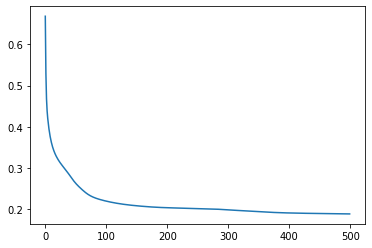

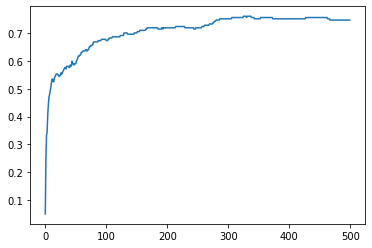

In [ ]:
import matplotlib.pyplot as plt

plot1 = plt.figure(1)
plt.plot(loss_values)
plt.show()

plot1 = plt.figure(1)
plt.plot(acc_values)
plt.show()